In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")

import requests
from bs4 import BeautifulSoup as bs
from datetime import date,timedelta
from datetime import datetime as d

In [4]:
df = pd.read_csv(r"C:\Users\Tejas\Downloads\COVID-19 Cases(27-07-2020).csv")
df.drop(columns=["S. No."],inplace=True)
df.head()

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,12/03/2020,India,74,71,3.0,0.0
1,13/03/2020,India,75,71,3.0,1.0
2,14/03/2020,India,84,72,10.0,2.0
3,15/03/2020,India,107,95,10.0,2.0
4,16/03/2020,India,114,99,13.0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4742 non-null   object 
 1   Region            4742 non-null   object 
 2   Confirmed Cases   4742 non-null   int64  
 3   Active Cases      4742 non-null   int64  
 4   Cured/Discharged  4604 non-null   float64
 5   Death             4741 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 222.4+ KB


In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4604 entries, 0 to 4604
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4604 non-null   object 
 1   Region            4604 non-null   object 
 2   Confirmed Cases   4604 non-null   int64  
 3   Active Cases      4604 non-null   int64  
 4   Cured/Discharged  4604 non-null   float64
 5   Death             4604 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 251.8+ KB


In [7]:
all_states_df = df[122:4021]
all_states_df.head()

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
122,12/07/2020,India,849553,292258,534621.0,22674.0
123,13/07/2020,India,878254,301609,553471.0,23174.0
124,14/07/2020,India,906752,311565,571460.0,23727.0
125,15/07/2020,India,936181,319840,592032.0,24309.0
126,16/07/2020,India,968876,331146,612815.0,24915.0


In [1147]:
all_states_df.tail()

,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
S. No.,,,,,,
4018,07-07-2020,West Bengal,22987,6973,15235.0,779.0
4019,08-07-2020,West Bengal,23837,7243,15790.0,804.0
4020,09-07-2020,West Bengal,24823,7705,16291.0,827.0
4021,10-07-2020,West Bengal,25911,8231,16826.0,854.0
4022,11-07-2020,West Bengal,27109,8881,17348.0,880.0


In [1493]:
states_df = all_states_df.groupby('Region')
state_df = [pd.DataFrame(states_df.get_group(state)) for state in states_df.groups]

In [1494]:
state_df[0].head()

,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
S. No.,,,,,,
123,27-03-2020,Andaman and Nicobar Islands,1,1,0.0,0.0
124,28-03-2020,Andaman and Nicobar Islands,6,6,0.0,0.0
125,29-03-2020,Andaman and Nicobar Islands,9,9,0.0,0.0
126,30-03-2020,Andaman and Nicobar Islands,9,9,0.0,0.0
127,31-03-2020,Andaman and Nicobar Islands,10,10,0.0,0.0


In [1495]:
state_df[0].tail()

,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
S. No.,,,,,,
225,07-07-2020,Andaman and Nicobar Islands,141,67,74.0,0.0
226,08-07-2020,Andaman and Nicobar Islands,147,72,75.0,0.0
227,09-07-2020,Andaman and Nicobar Islands,149,72,77.0,0.0
228,10-07-2020,Andaman and Nicobar Islands,151,68,83.0,0.0
229,11-07-2020,Andaman and Nicobar Islands,156,64,92.0,0.0


In [1496]:
region_dict = {}
for region in states_df.groups:
    region_dict[region] = pd.DataFrame(states_df.get_group(region))
    region_dict[region].index = pd.to_datetime(region_dict[region].Date,format='%d-%m-%Y')
#     break

region_dict[region].tail()

,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
Date,,,,,,
2020-07-07,07-07-2020,West Bengal,22987,6973,15235.0,779.0
2020-07-08,08-07-2020,West Bengal,23837,7243,15790.0,804.0
2020-07-09,09-07-2020,West Bengal,24823,7705,16291.0,827.0
2020-07-10,10-07-2020,West Bengal,25911,8231,16826.0,854.0
2020-07-11,11-07-2020,West Bengal,27109,8881,17348.0,880.0


Karnataka_df = state_df[0]
Karnataka_df.index = pd.to_datetime(Karnataka_df.Date,format='%d-%m-%Y')
#Karnataka_df.drop(columns=["Date","Region"], axis=1, inplace=True)
Karnataka_df.head()

n = 30
Karnataka_df.Confirmed_Cases_diff = Karnataka_df.Confirmed_Cases.diff(n)[n:]

#initilizing ARIMA model
model = ARIMA(Karnataka_df.Confirmed_Cases_diff[:-7], order=(5,1,2))
model_fit = model.fit()
print(model_fit.aic)

#multi-step out-of-sample forecast
forecast, std_error, confidence_interval = model_fit.forecast(steps=7)
forecast

forecasted_difference = pd.DataFrame(Karnataka_df.Confirmed_Cases_diff[-7:])
forecasted_difference["forecasted"] = forecast
forecasted_difference.tail()

plt.plot(forecasted_difference)

forecasted_high = pd.DataFrame([i*1.05 for i in forecasted_difference.forecasted], index=Karnataka_df.index[-7:])
forecasted_low = pd.DataFrame([i*0.95 for i in forecasted_difference.forecasted], index=Karnataka_df.index[-7:])

forecasted_difference["forecasted_high"] = forecasted_high
forecasted_difference["forecasted_low"] = forecasted_low

forecasted_difference

plt.figure("Forecast", figsize=(16,8))
plt.plot(forecasted_difference.index, forecasted_difference.Confirmed_Cases)
plt.plot(forecasted_difference.index, forecasted_difference.forecasted)
plt.plot(forecasted_difference.index, forecasted_difference.forecasted_high, color="dimgray", linestyle="--")
plt.plot(forecasted_difference.index, forecasted_difference.forecasted_low, color="dimgray", linestyle="--")
plt.legend()

In [1035]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")

import requests
from bs4 import BeautifulSoup as bs
from datetime import date

In [1504]:
def find_best_params(state, pdq):
    aic_values = []
    for param in pdq:
        try:
            #initilizing ARIMA model
            model = ARIMA(state.Confirmed_Cases_diff[:-7], order=param)
            model_fit = model.fit()
#             print(param, model_fit.aic)
            aic_values.append([param, model_fit.aic])
        except:
            pass

    aic_values = np.array(aic_values)
    a = np.where(aic_values == aic_values[:,1].min())[0][0]
    return aic_values[a][0]

def fit_model():
    df = pd.read_csv("COVID_Database.csv")
    cols = list(df.columns)
    cols = [i.replace(" ","_") for i in cols]
    df.columns = cols

    states_df = df.groupby('Region')
    state_df = [pd.DataFrame(states_df.get_group(state)) for state in states_df.groups]
    
    p=range(0,9)
    d=range(0,3)
    q=range(0,5)
    pdq = list(itertools.product(p,d,q))

    state_model = {}
    for state in state_df[-1:]:

        state.index = pd.to_datetime(state.Date,format='%d-%m-%Y')
    #     state.drop(columns=["Date","Region"], axis=1, inplace=True)

        print("Processing:", state.Region[0])

        n = 30
        state.Confirmed_Cases_diff = state.Confirmed_Cases.diff(n)[n:]
        params = find_best_params(state, pdq)

        #initilizing ARIMA model
        model = ARIMA(state.Confirmed_Cases_diff[:-7], order=params)
        model_fit = model.fit()
        print(params)

        state_model[str(state.Region[0])] = model_fit

    #     break
    print("DONE")
    return state_model

Processing: West Bengal
(2, 2, 1)
DONE


Processing: West Bengal
(2, 2, 1)
DONE

In [1184]:
model_fit = state_model["Andaman and Nicobar Islands"]
# multi-step out-of-sample forecast
n = 30
state.Confirmed_Cases_diff = state.Confirmed_Cases.diff(n)[n:]

n = 7
forecast, std_error, confidence_interval = model_fit.forecast(steps=n)
forecast

array([ 89.22924553,  96.75052531, 104.37179708, 111.70344735,
       119.34391537, 127.23758371, 135.17097145])

In [1185]:
forecasted_difference = pd.DataFrame(index=state_df[0].index[-n:])
forecasted_difference["Confirmed_Cases"] = state_df[0].Confirmed_Cases_diff[-n:]
forecasted_difference["forecasted"] = forecast

forecasted_high = pd.DataFrame([i*1.05 for i in forecasted_difference.forecasted], index=Karnataka_df.index[-n:])
forecasted_low = pd.DataFrame([i*0.95 for i in forecasted_difference.forecasted], index=Karnataka_df.index[-n:])

forecasted_difference["forecasted_high"] = forecasted_high
forecasted_difference["forecasted_low"] = forecasted_low

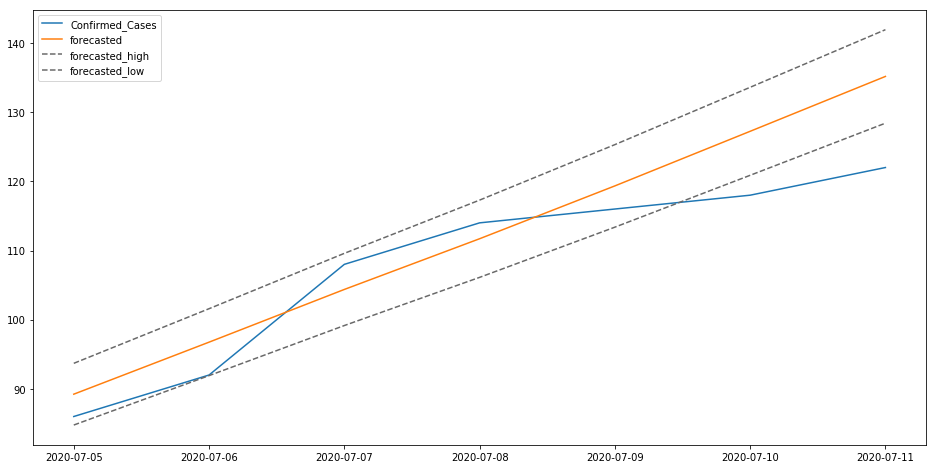

In [1186]:
plt.figure("Forecast", figsize=(16,8))
plt.plot(forecasted_difference.index, forecasted_difference.Confirmed_Cases)
plt.plot(forecasted_difference.index, forecasted_difference.forecasted)
plt.plot(forecasted_difference.index, forecasted_difference.forecasted_high, color="dimgray", linestyle="--")
plt.plot(forecasted_difference.index, forecasted_difference.forecasted_low, color="dimgray", linestyle="--")
plt.legend()

In [1187]:
#initilizing ARIMA model
model = ARIMA(state.Confirmed_Cases_diff[:-7], order=params)
model_fit = model.fit()
print(params, model_fit.aic)

(2, 2, 1) 318.3882016635306


In [1188]:
state_df[0].tail()

,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
Date,,,,,,
2020-07-07,07-07-2020,Andaman and Nicobar Islands,141,67,74.0,0.0
2020-07-08,08-07-2020,Andaman and Nicobar Islands,147,72,75.0,0.0
2020-07-09,09-07-2020,Andaman and Nicobar Islands,149,72,77.0,0.0
2020-07-10,10-07-2020,Andaman and Nicobar Islands,151,68,83.0,0.0
2020-07-11,11-07-2020,Andaman and Nicobar Islands,156,64,92.0,0.0


In [1189]:
forecasted_difference

,Confirmed_Cases,forecasted,forecasted_high,forecasted_low
Date,,,,
2020-07-05,86.0,89.229246,93.690708,84.767783
2020-07-06,92.0,96.750525,101.588052,91.912999
2020-07-07,108.0,104.371797,109.590387,99.153207
2020-07-08,114.0,111.703447,117.288620,106.118275
2020-07-09,116.0,119.343915,125.311111,113.376720
2020-07-10,118.0,127.237584,133.599463,120.875705
2020-07-11,122.0,135.170971,141.929520,128.412423


In [1216]:
model_fit = state_model["Andaman and Nicobar Islands"]
# multi-step out-of-sample forecast
n = 30
state.Confirmed_Cases_diff = state.Confirmed_Cases#.diff(n)[n:]

n = 7
#initilizing ARIMA model
model = ARIMA(state.Confirmed_Cases_diff[:-1], order=(2,2,1))
model_fit = model.fit()
forecast, std_error, confidence_interval = model_fit.forecast(steps=n)
forecast

array([158.16953414, 164.5808215 , 169.03920599, 174.16060901,
       180.02683723, 185.55293062, 190.87451748])

In [1217]:
forecasted_df = pd.DataFrame(forecast, columns=["forecast"])
forecasted_df.index = pd.date_range(start='2020-07-11', periods=7)
forecasted_df.head()

,forecast
2020-07-11,158.169534
2020-07-12,164.580822
2020-07-13,169.039206
2020-07-14,174.160609
2020-07-15,180.026837


In [1595]:
def update_database(region_dict):
    res = requests.get("https://prsindia.org/covid-19/cases")
    soup = bs(res.content,'lxml')
    table = soup.find_all('table')[0] 
    df = pd.read_html(str(table))[0]
    df.drop(columns=["#"], inplace=True)
    cols = list(df.columns)
    cols[0] = "Region"
    cols = [i.replace(" ","_") for i in cols]
    df.columns = cols
    df["Date"] = [date.today().strftime('%Y-%m-%d') for i in range(len(df))]
    df.index = pd.to_datetime(df.Date,format='%Y-%m-%d')
    for i,region in enumerate(region_dict):
        region_dict[region] = region_dict[region].append(df[df.Region == region], sort=False, ignore_index=True)
        try:
            region_dict[region].index = pd.to_datetime(region_dict[region].Date,format='%d-%m-%Y')
        except:
            region_dict[region].index = pd.to_datetime(region_dict[region].Date,format='%Y-%m-%d')
        
    return region_dict

In [1489]:
update_database(region_dict)

In [1490]:
region_dict[region].tail()

,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
Date,,,,,,
2020-07-08,08-07-2020,West Bengal,23837,7243,15790.0,804.0
2020-07-09,09-07-2020,West Bengal,24823,7705,16291.0,827.0
2020-07-10,10-07-2020,West Bengal,25911,8231,16826.0,854.0
2020-07-11,11-07-2020,West Bengal,27109,8881,17348.0,880.0
2020-07-13,13-07-2020,West Bengal,30013,10500,18581.0,932.0


def parser(d):
    return datetime.strptime(d, '%d/%m/%Y')

df = pd.read_csv(r"C:\Users\Tejas\Downloads\COVID-19 Cases(13-07-2020).csv", index_col="S. No.", parse_dates=["Date"], date_parser=parser)
cols = list(df.columns)
cols = [i.replace(" ","_") for i in cols]
df.columns = cols
df.head()

df.dropna(inplace=True)
df.info()

all_states_df = df[124:4095]
all_states_df.tail()

states_df = all_states_df.groupby('Region')
state_df = [pd.DataFrame(states_df.get_group(state)) for state in states_df.groups]

state_df[0].tail()

,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
3966,2020-07-09,West Bengal,24823,7705,16291.0,827.0
3967,2020-07-10,West Bengal,25911,8231,16826.0,854.0
3968,2020-07-11,West Bengal,27109,8881,17348.0,880.0
3969,2020-07-12,West Bengal,28453,9588,17959.0,906.0
3970,2020-07-13,West Bengal,30013,10500,18581.0,932.0


In [210]:
%%writefile "Update_Database.py"

import pandas as pd
import numpy as np
# from statsmodels.tsa.arima_model import ARIMA
# import matplotlib.pyplot as plt
# import itertools
import warnings
warnings.filterwarnings("ignore")

import requests
from bs4 import BeautifulSoup as bs
from datetime import date

def update(region_dict):
    res = requests.get("https://prsindia.org/covid-19/cases")
    soup = bs(res.content,'lxml')
    table = soup.find_all('table')[0] 
    df = pd.read_html(str(table))[0]
    df.drop(columns=["#"], inplace=True)
    cols = list(df.columns)
    cols[0] = "Region"
    cols = [i.replace(" ","_") for i in cols]
    df.columns = cols
    df["Date"] = [date.today().strftime('%Y-%m-%d') for i in range(len(df))]
    df.index = pd.to_datetime(df.Date,format='%Y-%m-%d')
    for i,region in enumerate(region_dict):
        region_dict[region] = region_dict[region].append(df[df.Region == region], sort=False, ignore_index=True)
        try:
            region_dict[region].index = pd.to_datetime(region_dict[region].Date,format='%d-%m-%Y')
        except:
            region_dict[region].index = pd.to_datetime(region_dict[region].Date,format='%Y-%m-%d')
        
    return region_dict

def update_database():
    
    df = pd.read_csv("COVID_Database.csv")
    cols = list(df.columns)
    cols = [i.replace(" ","_") for i in cols]
    df.columns = cols

    states_df = df.groupby('Region')
    state_df = [pd.DataFrame(states_df.get_group(state)) for state in states_df.groups]

    region_dict = {}
    for region in states_df.groups:
        region_dict[region] = pd.DataFrame(states_df.get_group(region))
        try:
            region_dict[region].index = pd.to_datetime(region_dict[region].Date,format='%Y-%m-%d')
        except:
            region_dict[region].index = pd.to_datetime(region_dict[region].Date,format='%d-%m-%Y')

        region_dict = update(region_dict)
    #     break

    df = pd.DataFrame()
    for region in region_dict.keys():
        df = df.append(region_dict[region], sort=False, ignore_index=True)

    cols = list(df.columns)
    cols = [i.replace(" ","_") for i in cols]
    df.columns = cols
    df.drop_duplicates(inplace=True)
    
    df.to_csv("COVID_Database.csv", index=False)
    
    return "Database Updated"

Overwriting Update_Database.py


In [4]:
from Update_Database import update_database

In [3]:
update_database()

'Database Updated'

In [250]:
%%writefile "main_app.py"

import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")

import requests
from bs4 import BeautifulSoup as bs
from datetime import date, timedelta
import joblib


def get_previous_cases(region):
    df = pd.read_csv("COVID_Database.csv")
    df.index = df.Date
    try:
        yesterday = df.Confirmed_Cases[df.Region==region][str(date.today()-timedelta(1))]
        today = df.Confirmed_Cases[df.Region==region][str(date.today())]
        as_on = str(date.today())
    except:
        yesterday = df.Confirmed_Cases[df.Region==region][-2]
        today = df.Confirmed_Cases[df.Region==region][-1]
        as_on = df.Date[df.Region==region][-1]
        
    del df
    return today, yesterday, as_on

def find_best_params(state, pdq):
    aic_values = []
    for param in pdq:
        try:
            #initilizing ARIMA model
            model = ARIMA(state.Confirmed_Cases_diff[:-2], order=param)
            model_fit = model.fit()
#             print(param, model_fit.aic)
            aic_values.append([param, model_fit.aic])
        except:
            pass

    aic_values = np.array(aic_values)
    a = np.where(aic_values == aic_values[:,1].min())[0][0]
    return aic_values[a][0]

def fit_model():
    df = pd.read_csv("COVID_Database.csv")
    cols = list(df.columns)
    cols = [i.replace(" ","_") for i in cols]
    df.columns = cols

    states_df = df.groupby('Region')
    state_df = [pd.DataFrame(states_df.get_group(state)) for state in states_df.groups]
    
    p=range(0,9)
    d=range(0,3)
    q=range(0,5)
    pdq = list(itertools.product(p,d,q))

    state_model = {}
    for state in state_df[:]:

        state.index = pd.to_datetime(state.Date,format='%Y-%m-%d')
    #     state.drop(columns=["Date","Region"], axis=1, inplace=True)

        print("Processing:", state.Region[0])

        state.Confirmed_Cases_diff = state.Confirmed_Cases
        params = find_best_params(state, pdq)

        #initilizing ARIMA model
        model = ARIMA(state.Confirmed_Cases_diff[:-2], order=params)
        model_fit = model.fit()
#         print(params)

        state_model[str(state.Region[0])] = model_fit

#         break

    for region in state_model.keys():
        joblib.dump(state_model[region], region+".ml")
        
#     print("DONE")
    return "DONE"

def forecast_cases(region, n=7):
    
    model_fit = joblib.load(region+".ml")
    # multi-step out-of-sample forecast
    forecast, std_error, confidence_interval = model_fit.forecast(steps=n)
    forecast = [round(cases) for cases in forecast]
    return forecast

Overwriting main_app.py


In [506]:
import time
# from sklearn.externals import joblib
import joblib

from main_app import fit_model

In [ ]:
start = time.time()
fit_model()
end = time.time()
print("Time Taken: {}s".format(end-start))

Processing: Andaman and Nicobar Islands
Processing: Andhra Pradesh


In [ ]:
def get_previous_cases():
    df = pd.read_csv("COVID_Database.csv")
    yesterday = df.Confirmed_Cases.loc[date.today()-timedelta(1)]
    today = df.Confirmed_Cases.loc[date.today()]
    return today, yesterday

In [258]:
%%writefile "app.py"
from main_app import fit_model, forecast_cases, get_previous_cases
from Update_Database import update_database
from datetime import date, timedelta
from datetime import datetime as d
from pandas import date_range
import flask
from flask import request
app = flask.Flask(__name__)
app.config["DEBUG"] = True
from flask_cors import CORS

def result_to_html(result, region):
    today, yesterday, as_on = get_previous_cases(region)
    as_on = d.strptime('2020-07-15', "%Y-%m-%d").date()
    res='<h2> COVID-19 Forecasts For {}</h2>\n'.format(region)
    res+='<table>\n'
    yesterday_d = (as_on-timedelta(days=1)).strftime('%Y-%m-%d')
    dates = date_range(yesterday_d, periods=7).strftime('%Y-%m-%d')
    result = zip(dates,result)
    res+='<thead>\n'
    res+='<tr><th><h2> Date ::</h2></th><th><h2>Predicted No. of Cases</h2></th></tr>\n'
    res+='</thead>\n'
    res+='<tbody>'
    for row in result:
        res+='<tr><td><h2>&nbsp;&nbsp;&nbsp;&nbsp;{} :</h2></td><td><h2>{} &#177; &nbsp; 5%</h2></td></tr>\n'.format(row[0],row[1])
    res+='</tbody>'
    res+='</table>\n\n'
    res+='<h3>Confirmed Cases as of Yesterday : {}</h3>\n'.format(yesterday)
    res+='<h3>Confirmed Cases as of Today : {}</h3>\n'.format(today)
    res+='<h3>As on : {}</h3>\n'.format(as_on)
    res+='<h3>Data Source Used for Training: <a href="https://prsindia.org/covid-19/cases">Visit prsindia.org</a></h3>'
    return res

CORS(app)

# main index page route
@app.route('/')
def home():
    return '<h1>API is working.. </h1>'


@app.route('/forecast',methods=['GET'])
def forecast():
    region = str(request.args["region"])
    forecast = forecast_cases(region)
    
    return result_to_html(forecast, region)

@app.route('/update')
def update():
    update_database()
    
    return "Database Updated"

@app.route('/train')
def train():
    fit_model()
    
    return "Database Updated"


if __name__ == "__main__":
    app.run(debug=True, port='9000',host='0.0.0.0')


Overwriting app.py


In [ ]:
def html_table(string):
    print '<table>'
    for sublist in lol:
        print '  <tr><td>'
        print '    </td><td>'.join(sublist)
        print '  </td></tr>'
    print '</table>'

In [95]:
def result_to_html(result):
    res='<table>\n'
    yesterday = (date.today()-timedelta(days=1)).strftime('%Y-%m-%d')
    dates = date_range(yesterday, periods=7).strftime('%Y-%m-%d')
    result = zip(dates,result)
    res+='<thead>\n'
    res+='<tr><th><h2>Date</h2></th><th><h2>{}</h2><h2>Predicted No. of Cases</h2></th></tr>\n'.format(" ")
    res+='</thead>\n'
    res+='<tbody>'
    for row in result:
        res+='<tr><td><h2>{}</h2></td><td><h2>{}</h2></td><td><h2>{}</h2></td></tr>\n'.format(row[0]," : ",row[1])
    res+='</tbody>'
    res+='</table>\n'
    return res

In [87]:
def result_to_html(result):
    res = []
    res.append('<table>')
    yesterday = (date.today()-timedelta(days=1)).strftime('%Y-%m-%d')
    dates = pd.date_range(yesterday, periods=7).strftime('%Y-%m-%d')
    result = zip(dates,result)
    for row in result:
        res.append('<tr><td><h1>{}</h1></td><td><h1>{}</h1></td><td><h1>{}</h1></td></tr>'.format(row[0]," : ",row[1]))
    res.append('</table>')
    return res

In [88]:
a = ["Aa","Bb","Cc"]
result_to_html(l)

['<table>', '<tr><td><h1>2020-07-14</h1></td><td><h1> : </h1></td><td><h1>a</h1></td></tr>', '<tr><td><h1>2020-07-15</h1></td><td><h1> : </h1></td><td><h1>b</h1></td></tr>', '<tr><td><h1>2020-07-16</h1></td><td><h1> : </h1></td><td><h1>c</h1></td></tr>', '<tr><td><h1>2020-07-17</h1></td><td><h1> : </h1></td><td><h1>d</h1></td></tr>', '<tr><td><h1>2020-07-18</h1></td><td><h1> : </h1></td><td><h1>e</h1></td></tr>', '<tr><td><h1>2020-07-19</h1></td><td><h1> : </h1></td><td><h1>f</h1></td></tr>', '<tr><td><h1>2020-07-20</h1></td><td><h1> : </h1></td><td><h1>g</h1></td></tr>', '</table>']


['<table>',
 '<tr><td><h1>2020-07-14</h1></td><td><h1> : </h1></td><td><h1>a</h1></td></tr>',
 '<tr><td><h1>2020-07-15</h1></td><td><h1> : </h1></td><td><h1>b</h1></td></tr>',
 '<tr><td><h1>2020-07-16</h1></td><td><h1> : </h1></td><td><h1>c</h1></td></tr>',
 '<tr><td><h1>2020-07-17</h1></td><td><h1> : </h1></td><td><h1>d</h1></td></tr>',
 '<tr><td><h1>2020-07-18</h1></td><td><h1> : </h1></td><td><h1>e</h1></td></tr>',
 '<tr><td><h1>2020-07-19</h1></td><td><h1> : </h1></td><td><h1>f</h1></td></tr>',
 '<tr><td><h1>2020-07-20</h1></td><td><h1> : </h1></td><td><h1>g</h1></td></tr>',
 '</table>']

In [68]:
with open("temp.html", "w") as file:
    for row in res:
        file.write(row)

In [69]:
yesterday = (date.today()-timedelta(days=1)).strftime('%Y-%m-%d')
yesterday

'2020-07-14'

In [41]:
dates = pd.date_range(yesterday,periods=7)
dates

DatetimeIndex(['2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-18', '2020-07-19', '2020-07-20'],
              dtype='datetime64[ns]', freq='D')

In [44]:
l = np.array(["a","b","c","d","e","f","g"])
len(l),l

(7, array(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='<U1'))

In [48]:
s = zip(dates,l)
for i in s:
    print(i[0], i[1])
    break

2020-07-14 00:00:00 a


In [79]:
from main_app import *

In [43]:
l = np.array(["a","b","c"])

(7, array(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='<U1'))

In [134]:
df = pd.read_csv(r"F:\DataScience\AWS\ec2-user@13.233.251.25\COVID_Database.csv")
df.tail()

,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
4038,2020-07-11,West Bengal,27109,8881,17348.0,880.0
4039,2020-07-12,West Bengal,28453,9588,17959.0,906.0
4040,2020-07-13,West Bengal,30013,10500,18581.0,932.0
4041,2020-07-14,West Bengal,31448,11279,19213.0,956.0
4042,2020-07-15,West Bengal,32838,11927,19931.0,980.0


In [148]:
def find_best_params(state, pdq):
    aic_values = []
    for param in pdq:
        try:
            #initilizing ARIMA model
            model = ARIMA(state.Confirmed_Cases_diff[:-2], order=param)
            model_fit = model.fit()
#             print(param, model_fit.aic)
            aic_values.append([param, model_fit.aic])
        except:
            pass

    aic_values = np.array(aic_values)
    a = np.where(aic_values == aic_values[:,1].min())[0][0]
    return aic_values[a][0]

In [149]:
def fit_model():
    df = pd.read_csv(r"F:\DataScience\AWS\ec2-user@13.233.251.25\COVID_Database.csv")
    cols = list(df.columns)
    cols = [i.replace(" ","_") for i in cols]
    df.columns = cols

    states_df = df.groupby('Region')
    state_df = [pd.DataFrame(states_df.get_group(state)) for state in states_df.groups]
    
    p=range(0,9)
    d=range(0,3)
    q=range(0,5)
    pdq = list(itertools.product(p,d,q))

    state_model = {}
    for state in state_df[15:16]:

        state.index = pd.to_datetime(state.Date,format='%Y-%m-%d')
    #     state.drop(columns=["Date","Region"], axis=1, inplace=True)

        print("Processing:", state.Region[0])

        n = 30
        state.Confirmed_Cases_diff = state.Confirmed_Cases#.diff(n)[n:]
        params = find_best_params(state, pdq)
        print(params)
        
        #initilizing ARIMA model
        model = ARIMA(state.Confirmed_Cases_diff[:-2], order=params)
        model_fit = model.fit()
#         print(params)

        state_model[str(state.Region[0])] = model_fit

#         break

    for region in state_model.keys():
#         joblib.dump(state_model[region], region+".ml")
        joblib.dump(state_model[region], r"F:\DataScience\AWS\ec2-user@13.233.251.25/"+region+".ml")
        
#     print("DONE")
    return "DONE"

In [150]:
fit_model()

Processing: Karnataka
(8, 2, 0)


'DONE'

In [151]:
def forecast_cases(region, n=7):
    
    model_fit = joblib.load(r"F:\DataScience\AWS\ec2-user@13.233.251.25/"+region+".ml")
    # multi-step out-of-sample forecast
    forecast, std_error, confidence_interval = model_fit.forecast(steps=n)
    return forecast, std_error,confidence_interval

In [152]:
forecast, std_error, confidence_interval = forecast_cases("Karnataka",7)
forecast

array([41410.41757088, 43987.74141222, 46692.53399802, 49793.49001124,
       52970.45576499, 56280.659978  , 59693.02985345])

In [153]:
confidence_interval[:5]

array([[41217.73274257, 41603.10239919],
       [43595.07322563, 44380.40959881],
       [46089.68629307, 47295.38170298],
       [48942.08867654, 50644.89134593],
       [51848.60182515, 54092.30970483]])

In [154]:
confidence_interval1 = []
for i, error in enumerate(std_error):
    confidence_interval1.append([confidence_interval[i,0]-error,confidence_interval[i,1]+error])
    
confidence_interval1 = np.array(confidence_interval1)
confidence_interval1

array([[41119.42235022, 41701.41279154],
       [43394.72863272, 44580.75419171],
       [45782.10528152, 47602.96271452],
       [48507.69225833, 51079.28776414],
       [51276.21684834, 54664.69468164],
       [54124.40826619, 58436.91168982],
       [57000.51100251, 62385.5487044 ]])

In [155]:
states_df = df.groupby('Region')
state_df = [pd.DataFrame(states_df.get_group(state)) for state in states_df.groups]

In [156]:
n = 30
state = state_df[15].copy()
state["Confirmed_Cases_diff"] = state.Confirmed_Cases.diff(n)[n:]
state.index = state.Date
state.tail(9)

,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death,Confirmed_Cases_diff
Date,,,,,,,
2020-07-07,2020-07-07,Karnataka,25317,14389,10527.0,401.0,20104.0
2020-07-08,2020-07-08,Karnataka,26815,15301,11098.0,416.0,21363.0
2020-07-09,2020-07-09,Karnataka,28877,16531,11876.0,470.0,23117.0
2020-07-10,2020-07-10,Karnataka,31105,17786,12833.0,486.0,25184.0
2020-07-11,2020-07-11,Karnataka,33418,19039,13836.0,543.0,27377.0
2020-07-12,2020-07-12,Karnataka,36216,20887,14716.0,613.0,29971.0
2020-07-13,2020-07-13,Karnataka,38843,22750,15409.0,684.0,32327.0
2020-07-14,2020-07-14,Karnataka,41581,24576,16248.0,757.0,34757.0
2020-07-15,2020-07-15,Karnataka,44077,25845,17390.0,842.0,37077.0


In [157]:
n=7
m=2 #2
forecasted_difference = pd.DataFrame(index=pd.date_range(state.Date[-m], periods=n)) 
forecasted_difference["Confirmed_Cases"] = state.Confirmed_Cases[-m:]
forecasted_difference["Confirmed_Cases"][:m] = state.Confirmed_Cases[-m:]
#pd.DataFrame(index=state.Date[-n:])
forecasted_difference["Confirmed_Cases_diff"] = state.Confirmed_Cases_diff[-m:]
forecasted_difference["Confirmed_Cases_diff"][:m] = state.Confirmed_Cases_diff[-m:]
forecasted_difference["forecasted"] = forecast

forecasted_high = pd.DataFrame([i*1.05 for i in forecasted_difference.forecasted], index=pd.date_range(state.Date[-m], periods=n))
forecasted_low = pd.DataFrame([i*0.95 for i in forecasted_difference.forecasted], index=pd.date_range(state.Date[-m], periods=n))

forecasted_difference["forecasted_high"] = confidence_interval1[:,0]
forecasted_difference["forecasted_low"] = confidence_interval1[:,1]

In [158]:
forecasted_difference

,Confirmed_Cases,Confirmed_Cases_diff,forecasted,forecasted_high,forecasted_low
2020-07-14,41581.0,34757.0,41410.417571,41119.422350,41701.412792
2020-07-15,44077.0,37077.0,43987.741412,43394.728633,44580.754192
2020-07-16,NaN,NaN,46692.533998,45782.105282,47602.962715
2020-07-17,NaN,NaN,49793.490011,48507.692258,51079.287764
2020-07-18,NaN,NaN,52970.455765,51276.216848,54664.694682
2020-07-19,NaN,NaN,56280.659978,54124.408266,58436.911690
2020-07-20,NaN,NaN,59693.029853,57000.511003,62385.548704


No handles with labels found to put in legend.


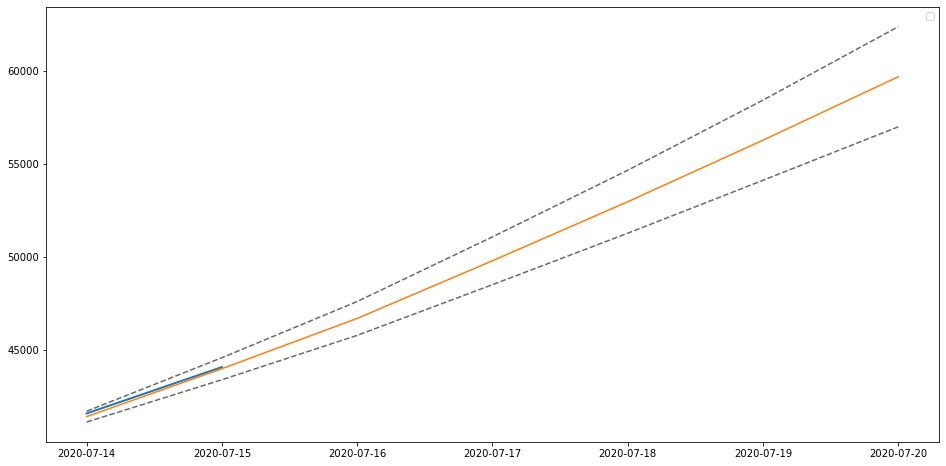

In [159]:
plt.figure("Forecast", figsize=(16,8))
plt.plot(forecasted_difference.index, forecasted_difference.Confirmed_Cases, linewidth=2.0) #, color="blue")
plt.plot(forecasted_difference.index, forecasted_difference.forecasted) #, color="orange")
# plt.plot(forecasted_difference.index, forecasted_difference.Confirmed_Cases, linewidth=1.0) #, color="blue")
plt.plot(forecasted_difference.index, forecasted_difference.forecasted_high, color="dimgray", linestyle="--")
plt.plot(forecasted_difference.index, forecasted_difference.forecasted_low, color="dimgray", linestyle="--")
plt.legend()

In [122]:
import plotly.graph_objects as go
import chart_studio.tools as tls

In [ ]:
#Create the graph
data = [go.Scatter(x=state_df[15]["Date"], y=state_df[15]["Confirmed_Cases"], mode='lines+markers', name='Confirmed Cases'),
go.Scatter(x=state_df[15]["Date"], y=state_df[15]["Active_Cases"], mode='lines+markers', name='Active Cases'),
go.Scatter(x=state_df[15]["Date"], y=state_df[15]["Cured/Discharged"], mode='lines+markers', name='Cured/Discharged'),
go.Scatter(x=state_df[15]["Date"], y=state_df[15]["Death"], mode='lines+markers', name='Deaths')]



#Edit the layout
fig.update_layout(template='plotly_white', legend=dict(x=0.01, y=0.99))
fig.update_layout(title='COVID-19 Cases', xaxis_title='Date', yaxis_title='Number of Cases')
fig.show()

graphJSON = json.dumps(data, cls=plotly.utils.PlotlyJSONEncoder)

In [ ]:
go.

In [ ]:
graphJSON = json.dumps(data, cls=plotly.utils.PlotlyJSONEncoder)

In [ ]:
@app.route('/')
def index():

    bar = create_plot()
    return render_template('index.html', plot=bar)

In [164]:
today = date.today().strftime("%y-%m-%d")

In [179]:
forecasted_difference.Confirmed_Cases.loc[(date.today()-timedelta(1)).strftime("%d-%m-%Y")]

41581.0

In [177]:
date.today()

datetime.date(2020, 7, 15)

In [186]:
df.index = df.Date.values
df.tail()

,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
2020-07-11,2020-07-11,West Bengal,27109,8881,17348.0,880.0
2020-07-12,2020-07-12,West Bengal,28453,9588,17959.0,906.0
2020-07-13,2020-07-13,West Bengal,30013,10500,18581.0,932.0
2020-07-14,2020-07-14,West Bengal,31448,11279,19213.0,956.0
2020-07-15,2020-07-15,West Bengal,32838,11927,19931.0,980.0


In [204]:
region = "Karnataka"
df.Confirmed_Cases[df.Region==region][str(date.today()-timedelta(1))]

41581

In [203]:
str(date.today()-timedelta(1))

'2020-07-14'

In [236]:
df.Confirmed_Cases[df.Region=="Karnataka"]['2020-07-15']

44077